### R9 AIML Sequential NLP Project
#### Domain - Digital content and entertainment industry.
#### Project - Build Text Classification model and do sentiment analysis on customer review.

#### Project Objective: Build a sequential NLP classifier which can use input text parameters to determine the customer sentiments.

DATA DESCRIPTION: The Dataset of 50,000 movie reviews from IMDB, labelled by
sentiment (positive/negative). Reviews have been preprocessed, and each review is
encoded as a sequence of word indexes (integers). For convenience, the words are
indexed by their frequency in the dataset, meaning the for that has index 1 is the
most frequent word. Use the first 20 words from each review to speed up training,
using a max vocabulary size of 10,000. As a convention, "0" does not stand for a
specific word, but instead is used to encode any unknown word.

In [1]:
#Import libraries
import os
%matplotlib inline
import matplotlib.pyplot as plt # Data Visualization
import pandas as pd # Data processing
import seaborn as sns # Data Visualization
import numpy as np # Linear Algebra
import tensorflow as tf #Tensor Flow
from sklearn import preprocessing #preprocessing libraries from sklearn

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

#Import libraries for this project
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb


* STEP1. Import and analyse the data set.
  - Get train and test set
  - Take 10000 most frequent words

In [2]:
max_features = 10000 # Size of vocabulary to be considered in the problem is 10000
# loading imdb data from keras
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [3]:
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

25000 train sequences
25000 test sequences


In [4]:
print('print sample feature data')
print(x_train[0:3])

print('\nprint sample label data')
print(y_train[0:3])

print sample feature data
[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8

In [5]:
# Retrieve the word index file mapping words to indices
word_index = imdb.get_word_index()

# Reverse the word index to obtain a dict mapping indices to words
inverted_word_index = dict((i, word) for (word, i) in word_index.items())

# Decode the first sequence in the dataset
print('**** Decoding first x_train data sequence')
decoded_sequence = " ".join(inverted_word_index.get(i - 3, '?') for i in x_train[0])
print(decoded_sequence)
print('\n**** First y_train label data')
print(y_train[0])

**** Decoding first x_train data sequence
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be pra

In [6]:
# Decode the second sequence in the dataset
print('**** Decoding second x_train data sequence')
decoded_sequence = " ".join(inverted_word_index.get(i - 3, '?') for i in x_train[1])
print(decoded_sequence)
print('\n**** Second y_train label data')
print(y_train[1])

**** Decoding second x_train data sequence
? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then

**** Second y_

##### We observe 0 label represents negative review and 1 label represents positive review

In [7]:
# Get max training sequence length
maxlen_train = max([len(x) for x in x_train])
minlen_train = min([len(x) for x in x_train])
maxlen_test = max([len(x) for x in x_test])
minlen_test = min([len(x) for x in x_test])

print("Max length - Training : ",maxlen_train)
print("Min length - Training : ",minlen_train,'\n')

print("Max length - Test : ",maxlen_test)
print("Min length - Test : ",minlen_test)

Max length - Training :  2494
Min length - Training :  11 

Max length - Test :  2315
Min length - Test :  7


##### We have review data with different lengths. For model we would need to same length data for which we will use padding from keras preprocessing library.

* STEP2. Perform relevant sequence adding on the data
  Use the first 20 words from each review to speed up training, using a max vocabulary size of 10,000.

In [8]:
#Problem objective says to limit to 20 words to faster processing

maxlen = 20 # cut texts after this number of words (among top max_features most common words)
print('Pad sequences - pre')
x_train_padded = sequence.pad_sequences(x_train, maxlen=maxlen , padding='pre')
x_test_padded = sequence.pad_sequences(x_test, maxlen=maxlen, padding='pre')

Pad sequences - pre


In [9]:
maxlen_train = max([len(x) for x in x_train_padded])
minlen_train = min([len(x) for x in x_train_padded])
maxlen_test = max([len(x) for x in x_test_padded])
minlen_test = min([len(x) for x in x_test_padded])

print("Max length - Training : ",maxlen_train)
print("Min length - Training : ",minlen_train,'\n')

print("Max length - Test : ",maxlen_test)
print("Min length - Test : ",minlen_test)

Max length - Training :  20
Min length - Training :  20 

Max length - Test :  20
Min length - Test :  20


* STEP3. Perform following data analysis:
  • Print shape of features and labels
  • Print value of any one feature and it's label

In [10]:
print('Feature train dataset shape:', x_train_padded.shape)
print('Feature test dataset  shape:', x_test_padded.shape)
print('Label train dataset shape:', y_train.shape)
print('Label test dataset shape:', y_test.shape)

Feature train dataset shape: (25000, 20)
Feature test dataset  shape: (25000, 20)
Label train dataset shape: (25000,)
Label test dataset shape: (25000,)


In [11]:
print('print sample feature data')
n = []
for i in range(3):
  k = np.random.randint(0, 100)
  n.append(k)
  print(k, 'sequence: ', *x_train_padded[k])
  print('label for above sequence:', y_train[k], '\n')


print sample feature data
70 sequence:  5 6998 8 63 18 4 436 2 223 32 183 2 83 31 5 6 1872 1129 143 12
label for above sequence: 1 

79 sequence:  5 4 6980 1218 11 4 2092 38 76 9 11 50 12 2346 73 6 2681 561 11 58
label for above sequence: 1 

54 sequence:  142 5 6 2001 291 154 12 3188 53 7 4 1569 74 4 1138 5 1346 9 184 1193
label for above sequence: 0 



* STEP4. Decode the feature value to get original sentence

In [12]:
# Decoding the above values

# Retrieve the word index file mapping words to indices
word_index = imdb.get_word_index()

# Reverse the word index to obtain a dict mapping indices to words
inverted_word_index = dict((i, word) for (word, i) in word_index.items())

# Decode the first sequence in the dataset
for i in n:
  decoded_sequence = " ".join(inverted_word_index.get(i - 3, '?') for i in x_train[i])
  print(i , 'sequence decoded:', decoded_sequence ,'\n')


70 sequence decoded: ? a stunning realization occurs when some sort of phenomenon takes place be it ? going off witnessing a robbery a ? ? devastating everything in it's path or for that matter any other spectacular ? in the case of the ? family however ? was something which was no more complex than their day to day lives montana in the early ? century was an environment which was rough and ? the ? family was comprised of four people the father a minister who was ? driven to raise his family properly his wife was god ? and ? the two boys were well boys what else can you say brad pitt starred in this film before he was really the brad pitt and his acting performance in this film was to say the least remarkable his brother norman was the cerebral type he was touched by emotions that were genuine and motivated by a set of values that ? montana ? with paul brad pitt was a ? from the ? and lived on the edge you would think that montana in the ? had no such thing yet somehow gambling drinkin

#### Sequence 70 and 79 are positive review and 54 is negative review. This can observed from the label as well as decoded review data for that sequence

* STEP5. Design, train, tune and test a sequential model.

In [13]:
# Sentiment analysis using GRU RNN
from tensorflow.keras.layers import GRU, SimpleRNN, Embedding, Bidirectional, SpatialDropout1D, Dropout

embedding_dim = 32

def Build_GRU():
  model = tf.keras.Sequential()
  # encoder
  model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))
  model.add(GRU(units=64,dropout=0.2))
  
  # latent space
  model.add(tf.keras.layers.Dense( units=64, activation='relu'))
  model.add(Dropout(0.5))
  model.add(tf.keras.layers.Dense( units=32, activation='relu'))
  model.add(Dropout(0.5))
  
  # In decoder secton, Sigmoid as activation function and binary  cross entropoy as loss function used for binary classification
  model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  print(model.summary())
  return model

# save the best model to the checkpoint
checkpoint_gru = tf.keras.callbacks.ModelCheckpoint('gru.h5', #where to save the model
                                                save_best_only=True, 
                                                monitor='val_accuracy',
                                                mode='max', 
                                                save_weights_only=False,
                                                verbose = 1)


In [14]:
# Sentiment analysis using Stacked RNN
embedding_dim = 32

def Build_StackedRNN():
  model = tf.keras.Sequential()
  # encoder
  model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))
  model.add(SimpleRNN(32,return_sequences=True))
  model.add(SimpleRNN(32))
  
  # latent space
  model.add(tf.keras.layers.Dense( units=64, activation='relu'))
  model.add(Dropout(0.5))
  model.add(tf.keras.layers.Dense( units=32, activation='relu'))
  model.add(Dropout(0.5))
  
  # In decoder secton, Sigmoid as activation function and binary  cross entropoy as loss function used for binary classification
  model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  print(model.summary())
  return model

# save the best model to the checkpoint
checkpoint_srnn = tf.keras.callbacks.ModelCheckpoint('srnn.h5', #where to save the model
                                                save_best_only=True, 
                                                monitor='val_accuracy',
                                                mode='max',
                                                save_weights_only=False, 
                                                verbose = 1)

In [15]:
# Sentiment analysis using Bidirectional RNN
embedding_dim = 32

def Build_BidirectionalRNN():
  model = tf.keras.Sequential()
  # encoder
  model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))
  model.add(Bidirectional(tf.keras.layers.LSTM(32,dropout=0.2)))
  
  # latent space
  model.add(tf.keras.layers.Dense( units=64, activation='relu'))
  model.add(Dropout(0.5))
  model.add(tf.keras.layers.Dense( units=32, activation='relu'))
  model.add(Dropout(0.5))
  
  # In decoder secton, Sigmoid as activation function and binary  cross entropoy as loss function used for binary classification
  model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  print(model.summary())
  return model

# save the best model to the checkpoint
checkpoint_birnn = tf.keras.callbacks.ModelCheckpoint('birnn.h5', #where to save the model
                                                save_best_only=True, 
                                                monitor='val_accuracy',
                                                mode='max',
                                                save_weights_only=False,
                                                verbose = 1)


In [16]:
def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='training_accuracy')
  plt.plot(history.history['val_accuracy'], label='validation_accuracy')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('accuracy')
  plt.legend(['training', 'validation'], loc='best')
  plt.grid(True)

def plot_loss(history):
  plt.plot(history.history['loss'], label='training_loss')
  plt.plot(history.history['val_loss'], label='validation_loss')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('loss')
  plt.legend(['training', 'validation'], loc='best')
  plt.grid(True)

In [17]:
def plotting(name):
  print('\n')
  print('\033[1m',name)
  plt.figure(figsize=(15,5))
  #plt.rcParams.update({'font.size': 10})
  plt.subplot(1,2,1)
  # Accuracy vs Epochs
  plot_accuracy(history)
  plt.subplot(1,2,2)
  # Loss vs Epochs
  plot_loss(history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 32)            320000    
_________________________________________________________________
gru (GRU)                    (None, 64)                18816     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3

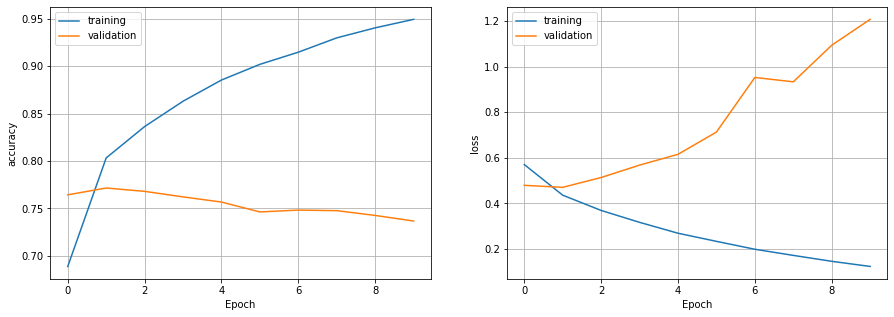

In [18]:
data = []
# Evaluate GRU model
model_rnn = Build_GRU()
history = model_rnn.fit(x_train_padded, y_train, epochs=10,validation_data=(x_test_padded, y_test),callbacks=[checkpoint_gru])
# Scores achieved for the model # achieved at epoch
best_epoch = pd.DataFrame(history.history['val_accuracy']).idxmax().values
validation_accuracy = pd.DataFrame(history.history['val_accuracy']).iloc[best_epoch,0]
Train_accuracy = pd.DataFrame(history.history['accuracy']).iloc[best_epoch,0]
validation_loss = pd.DataFrame(history.history['val_loss']).iloc[best_epoch,0]
Train_loss = pd.DataFrame(history.history['loss']).iloc[best_epoch,0]
plotting('GRU_Model')
print('Training Accuracy: %.2f and loss: %.2f' %(Train_accuracy*100, Train_loss)  )
print('Validation Accuracy: %.2f and loss :%.2f' %(validation_accuracy*100, validation_loss))

data = [['GRU_Model',(Train_accuracy*100), (validation_accuracy*100) ]]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 32)            320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                16640     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

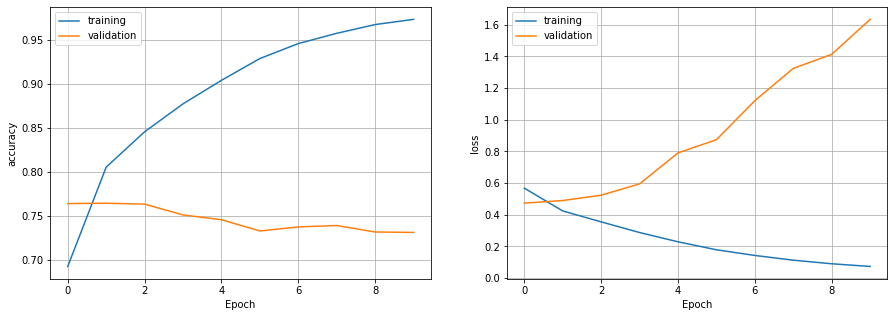

In [19]:
# Evaluate Bidirectional model
model_rnn = Build_BidirectionalRNN()
history = model_rnn.fit(x_train_padded, y_train, epochs=10,validation_data=(x_test_padded, y_test),callbacks=[checkpoint_birnn])
# Scores achieved for the model # achieved at epoch
best_epoch = pd.DataFrame(history.history['val_accuracy']).idxmax().values
validation_accuracy = pd.DataFrame(history.history['val_accuracy']).iloc[best_epoch,0]
Train_accuracy = pd.DataFrame(history.history['accuracy']).iloc[best_epoch,0]
validation_loss = pd.DataFrame(history.history['val_loss']).iloc[best_epoch,0]
Train_loss = pd.DataFrame(history.history['loss']).iloc[best_epoch,0]
plotting('BidirectionRNN_Model')
print('Training Accuracy: %.2f and loss: %.2f' %(Train_accuracy*100, Train_loss)  )
print('Validation Accuracy: %.2f and loss :%.2f' %(validation_accuracy*100, validation_loss))

data.append(['BiDirectionalRNN_Model',(Train_accuracy*100), (validation_accuracy*100) ])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 32)            320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 20, 32)            2080      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)               

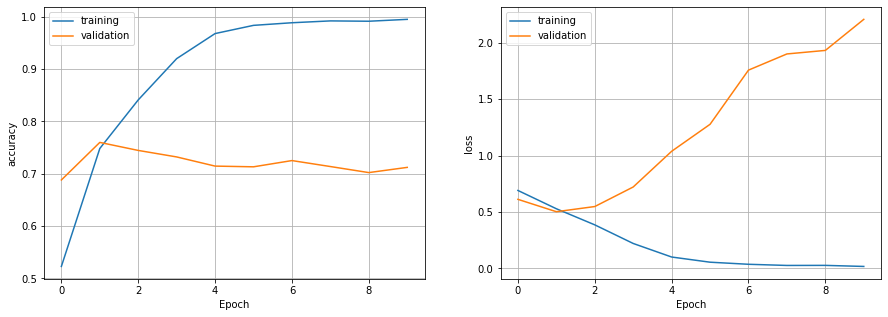

In [20]:
# Evaluate Stacked model
model_rnn = Build_StackedRNN()
history = model_rnn.fit(x_train_padded, y_train, epochs=10,validation_data=(x_test_padded, y_test),callbacks=[checkpoint_srnn])
# Scores achieved for the model # achieved at epoch
best_epoch = pd.DataFrame(history.history['val_accuracy']).idxmax().values
validation_accuracy = pd.DataFrame(history.history['val_accuracy']).iloc[best_epoch,0]
Train_accuracy = pd.DataFrame(history.history['accuracy']).iloc[best_epoch,0]
validation_loss = pd.DataFrame(history.history['val_loss']).iloc[best_epoch,0]
Train_loss = pd.DataFrame(history.history['loss']).iloc[best_epoch,0]
plotting('StackedRNN_Model')
print('Training Accuracy: %.2f and loss: %.2f' %(Train_accuracy*100, Train_loss)  )
print('Validation Accuracy: %.2f and loss :%.2f' %(validation_accuracy*100, validation_loss))

data.append(['StalkedRNN_Model',(Train_accuracy*100), (validation_accuracy*100) ])

In [21]:
from tabulate import tabulate
print ('\033[1m', tabulate(data, headers=["RNN Model", "Training_Score", "Test_Score"]))

 RNN Model                 Training_Score    Test_Score
----------------------  ----------------  ------------
GRU_Model                         80.32         77.148
BiDirectionalRNN_Model            80.512        76.416
StalkedRNN_Model                  74.816        75.98


##### GRU model is the best model so far due to slightly higher validation score than LSTM.
* GRU is performing nearly similiar related to LSTM. Both are utilizing different way of gating information to prevent vanishing gradient problem. 
* The GRU controls the flow of information like the LSTM unit, but without having to use a memory unit. It makes use of all the hidden states without any control. 
* GRU performance seems on par with LSTM, but computationally more efficient due to few parameters and able to train a bit faster and/or use less data to generalize. However with large data, the LSTMs with higher expressiveness would have provided better results.

* STEP6. Use the designed model to print the prediction on any one sample.

In [22]:
#loading the best model we pickled
from keras.models import load_model
best_model = load_model('gru.h5')
best_model.summary()
best_model.load_weights
best_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 32)            320000    
_________________________________________________________________
gru (GRU)                    (None, 64)                18816     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3

In [71]:
lst = [3, 7, 10, 20]
for m in lst:
  print('\n')
  print('\033[1m ------------------------ Test Sequence #',m, '------------------------')
  decoded_sequence = " ".join(inverted_word_index.get(i - 3, '?') for i in x_test[m])
  print(m ,'Padded Sequence: ', *x_test_padded[m])
  print(m, 'Sequence decoded:', decoded_sequence ,'\n')
  print('Ground Truth label for above sequence:', y_test[m])
  predicted = best_model.predict(x_test_padded[m].reshape(1,20))
  #print(predicted)
  #print(*np.round(predicted,decimals=0))
  print('Predicted label for above sequence:', np.int(np.round(predicted,decimals=0)))





 ------------------------ Test Sequence # 3 ------------------------
3 Padded Sequence:  75 26 2 574 19 4 1729 23 4 268 38 95 138 4 609 191 75 28 314 1772
3 Sequence decoded: ? i generally love this type of movie however this time i found myself wanting to kick the screen since i can't do that i will just complain about it this was absolutely idiotic the things that happen with the dead kids are very cool but the alive people are absolute idiots i am a grown man pretty big and i can defend myself well however i would not do half the stuff the little girl does in this movie also the mother in this movie is reckless with her children to the point of neglect i wish i wasn't so angry about her and her actions because i would have otherwise enjoyed the flick what a number she was take my advise and fast forward through everything you see her do until the end also is anyone else getting sick of watching movies that are filmed so dark anymore one can hardly see what is being filmed as an au

On above four test sequence tested, we observe one predicted incorrectly while other three correctly predicted.

## THANK YOU